<a href="https://colab.research.google.com/github/aniray2908/ML-foundations-rebuild/blob/main/statistical_learning/05_logistic_regression_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Demonstration

Goal:
- Visualize logistic decision boundary
- Understand probability outputs
- Compare linear vs logistic behavior


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Generate Linearly Separable Data

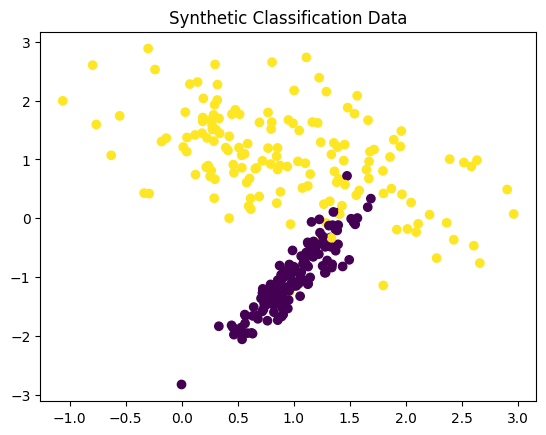

In [2]:
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Synthetic Classification Data")
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


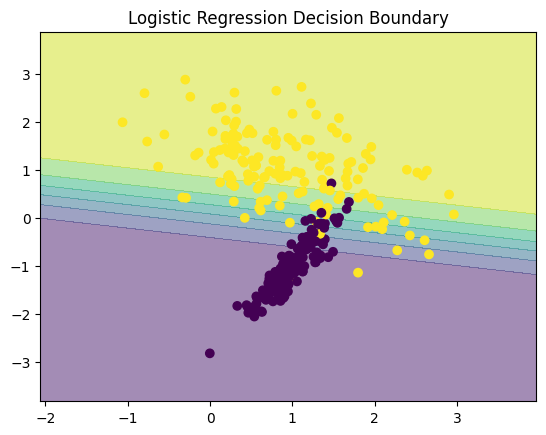

In [6]:
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:,1]
probs = probs.reshape(xx.shape)

plt.contourf(xx, yy, probs, alpha=0.5)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Logistic Regression Decision Boundary")
plt.show()

Observations:

- The decision boundary is linear.
- Probabilities smoothly transition across the boundary.
- Logistic regression models probability, not raw scores.
